# Problem 1: Logistic Regression - Training Stability

In [6]:
#Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/kasperh/Documents/MachineLearning/PS2/src")
import util

In [7]:
path_A = "data/ds1_a.csv"
path_B = "data/ds1_b.csv"

In [11]:
# Important note: you do not have to modify this file for your homework.


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return


def main():
    print('==== Training model on data set A ====')
    Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
    logistic_regression(Xa, Ya)

    #print('\n==== Training model on data set B ====')
    #Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)
    #logistic_regression(Xb, Yb)


if __name__ == '__main__':
    main()

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30390 iterations


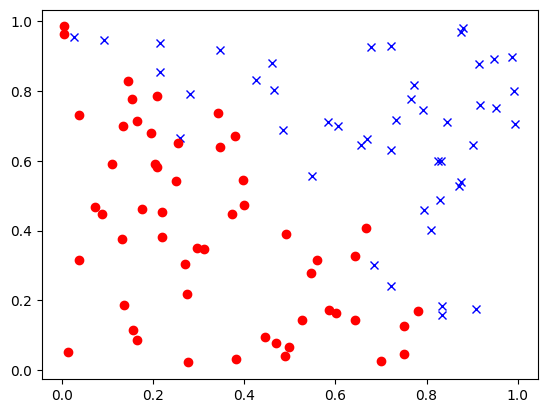

In [9]:
#We plot the two data sets:

#DS A:
x,y = util.load_csv('data/ds1_a.csv', add_intercept=True)
plt.figure()
plt.plot(x[y == 1, 1], x[y == 1, 2], 'bx', linewidth=2)
plt.plot(x[y == -1, 1], x[y == -1, 2], 'ro', linewidth=2)

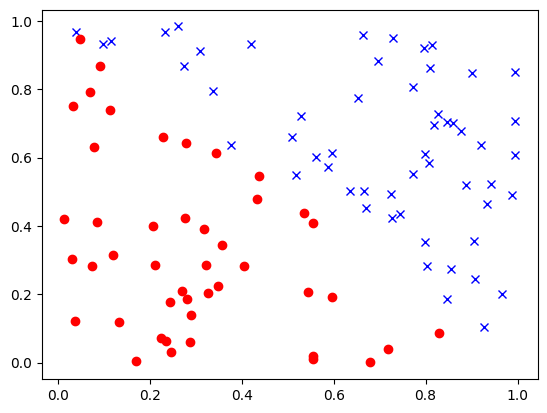

In [10]:
#DS B
x,y = util.load_csv('data/ds1_b.csv', add_intercept=True)
plt.figure()
plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
plt.plot(x[y == -1, -2], x[y == -1, -1], 'ro', linewidth=2)

We see that the first dataset is not separable, whereas the second dataset is separable. 

# (a)
When training on dataset A, training converges. When training on dataset B, it does not converge.

# (b) 
